In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
path="/Users/jesperdybkjaer/Documents/DTU/Kandidat/4.semester/3_SocialDataanalysisAndVisualization/Final_project"
os.chdir(path)

In [3]:
# import the data
df = pd.read_csv("trae_basis.csv")
df.head()

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,41,46,47,48,49,50,62,64,65,69,71,73,76,79,83,89,103,117,122,135,136,137,147,156,157,158,167,168,174,175,176,177,178,179,180,181) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573)
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558)
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244)
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861)
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036)


In [4]:
df.shape

(59580, 183)

# Map with bokeh
Inspirations from:
https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9

Dashboard/on page:
https://towardsdatascience.com/https-medium-com-radecicdario-next-level-data-visualization-dashboard-app-with-bokeh-flask-c588c9398f98

In [5]:
import pandas as pd
import urllib.request
import numpy as np

In [6]:
#import main Python libaries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#initialize visualization setup
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline

### Shapefiles of Copenhagen neighbourhoods

In [8]:
import urllib, geojson, gdal, subprocess

# Import shapefile from github:
# https://github.com/codeforamerica/click_that_hood/blob/master/public/data/copenhagen.geojson
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/copenhagen.geojson'
response = urllib.request.urlopen(url)
data = geojson.loads(response.read())

with open('data.geojson', 'w', encoding='utf-8') as f:
    geojson.dump(data, f)
    
    
args = ['ogr2ogr', '-f', 'ESRI Shapefile', 'destination_data.shp', 'data.geojson']
subprocess.Popen(args);

In [9]:
# Import geopandas package
import geopandas as gpd

# Read in shapefile and examine data
df_cph = gpd.read_file('destination_data.shp')
df_cph = df_cph.drop(['id','cartodb_id','created_at','updated_at'],axis=1)
df_cph

,bydel_nr,name,geometry
0,1,Indre By,"POLYGON ((12.61149 55.69763, 12.61534 55.69783..."
1,2,Østerbro,"POLYGON ((12.61591 55.72065, 12.62000 55.72348..."
2,5,Valby,"POLYGON ((12.52434 55.66666, 12.52449 55.66668..."
3,4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038..."
4,9,Amager Øst,"POLYGON ((12.63094 55.67050, 12.63126 55.67028..."
5,7,Brønshøj-Husum,"POLYGON ((12.46894 55.69976, 12.46698 55.70024..."
6,3,Nørrebro,"POLYGON ((12.56165 55.69667, 12.56152 55.69636..."
7,8,Bispebjerg,"POLYGON ((12.51594 55.70664, 12.51539 55.70693..."
8,6,Vanløse,"POLYGON ((12.46894 55.69976, 12.46935 55.69965..."
9,10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783..."


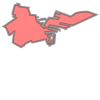

In [10]:
# Print out one district
df_cph.iloc[1]['geometry']

In [11]:
df_tree_sum=df.groupby('bydelsnavn')['id'].count()
df_tree_sum=pd.DataFrame(df_tree_sum,columns=['id'])
df_tree_sum=df_tree_sum.rename(columns={'id':'tree_sum'})
df_tree_sum

,tree_sum
bydelsnavn,
Amager Vest,4477
Amager Øst,3930
Bispebjerg,8268
Brønshøj-Husum,4160
Indre By,6105
Nørrebro,6770
Valby,4878
Vanløse,3915
Vesterbro-Kongens Enghave,6679


In [12]:
df_cph=df_cph.merge(df_tree_sum,left_on='name',right_on=df_tree_sum.index)
df_cph

,bydel_nr,name,geometry,tree_sum
0,1,Indre By,"POLYGON ((12.61149 55.69763, 12.61534 55.69783...",6105
1,2,Østerbro,"POLYGON ((12.61591 55.72065, 12.62000 55.72348...",7824
2,5,Valby,"POLYGON ((12.52434 55.66666, 12.52449 55.66668...",4878
3,4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
4,9,Amager Øst,"POLYGON ((12.63094 55.67050, 12.63126 55.67028...",3930
5,7,Brønshøj-Husum,"POLYGON ((12.46894 55.69976, 12.46698 55.70024...",4160
6,3,Nørrebro,"POLYGON ((12.56165 55.69667, 12.56152 55.69636...",6770
7,8,Bispebjerg,"POLYGON ((12.51594 55.70664, 12.51539 55.70693...",8268
8,6,Vanløse,"POLYGON ((12.46894 55.69976, 12.46935 55.69965...",3915
9,10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477


We can now merge the two dataframes together, trees and shape of district data.

In [13]:
# Merge shapefile with population data
df_tree_cph = df.merge(df_cph, left_on = 'bydelsnavn', right_on = 'name')

In [14]:
df_tree_cph.head()

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry,bydel_nr,name,geometry,tree_sum
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679


We can now convert the data to a format that is conducive to mapping.

In [15]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [16]:
# Input GeoJSON source that contains features for plotting
#geosource = GeoJSONDataSource(geojson = df2.to_json(default_handler=str)) # If it print this a error try use this
geosource = GeoJSONDataSource(geojson = df_cph.to_json())

Correct format, now ready to plot in Bokeh.

In [17]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, ranges, Legend
from bokeh.models.ranges import FactorRange

output_notebook()

Loading BokehJS ...

In [18]:
# Create figure object.
p = figure(title = 'Tree types in Copenhagen', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
neighbourhoods = p.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p.add_tools(HoverTool(renderers = [neighbourhoods],
                      tooltips = [('Neighbourhood','@name'),
                                ('Number of trees','@tree_sum')]))
show(p)

### SEE THE NICE MAP ABOVE

In [24]:
df_tree_cph['X']=np.zeros(len(df_tree_cph))
df_tree_cph['Y']=np.zeros(len(df_tree_cph))

In [25]:
for i in range(len(df_tree_cph)):
    temp = df_tree_cph['wkb_geometry'][i].split()
    df_tree_cph['X'][i]=float(temp[1][1:])
    df_tree_cph['Y'][i]=float(temp[2][:-1])

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


New map with colors

In [27]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 9000)

# Define custom tick labels for color bar.
tick_labels = {'0': '0', '1000': '1000',
 '2000':'2000', '3000':'3000',
 '4000':'4000', '5000':'5000',
 '6000':'6000', '7000':'7000','8000':'8000','9000':'9000+'}

# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Trees in Copenhagen neighbourhoods', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
neighbourhoods = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'tree_sum',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Draw the coordinates as circles
p.circle(x=df_tree_cph['X'], y=df_tree_cph['Y'],
           color='red', size=1, alpha=0.5)

# Create hover tool
p.add_tools(HoverTool(renderers = [neighbourhoods],
                      tooltips = [('Neighbourhood','@name'),
                                ('Number of trees','@tree_sum')]))

# Specify layout
p.add_layout(color_bar, 'below')
show(p)

In [30]:
df_tree_cph.columns[0:50]

Index(['FID', 'kategori', 'saerligt_trae', 'id', 'type', 'element',
       'under_element', 'ny_dm_element', 'ny_dm_under_element',
       'arbsted_tekst_id', 'driftsplan_navn', 'enhedsomraade', 'traeart',
       'dansk_navn', 'slaegtsnavn', 'planteaar', 'plantet_halvaar',
       'faeldningsaar', 'bydelsnavn', 'omraade', 'vejnavn', 'vejklasse',
       'vejstatus', 'fritrumsprofil', 'stammeomfang', 'kronediameter',
       'placering', 'afgraensning', 'plantemetode', 'omgivelse', 'vaekstmedie',
       'beskyttelse', 'sundhed', 'skudtilvaekst', 'andre_vaekstforhold',
       'bevaringsvaerdi', 'registrering_type', 'driftstatus_gadetrae', 'ejer',
       'driftsorganisation', 'garantiperioden_udloeber',
       'driftsaftale_edoc_nr', 'fredet_beskyttet_trae', 'fredningsmyndighed',
       'trae_historie', 'botanisk_interesse', 'fredet_trae_foto', 'donor',
       'anledning', 'saerlig_trae_bem'],
      dtype='object')

In [69]:
a=df_tree_cph[['X','Y']]

In [70]:
a

,X,Y
0,12.537047,55.648634
1,12.536925,55.648680
2,12.537001,55.648764
3,12.537133,55.648723
4,12.537400,55.648993
...,...,...
57001,12.588915,55.663513
57002,12.589373,55.663461
57003,12.590263,55.663359
57004,12.591113,55.663263


# Andreas' Bokeh imports

In [20]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import Legend
from bokeh.colors import named
from bokeh.models.tools import HoverTool
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import row, WidgetBox
output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')

Loading BokehJS ...

# Adding tree data to Bokeh plot

In [21]:
df.head()

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573)
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558)
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244)
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861)
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036)


### Sort the data the same way as Andreas
Drop the city names which are not given

In [22]:
df = df[df.bydelsnavn.notna()]
df.shape

(57006, 183)

Drop the tree names which are not given

In [23]:
df = df[df.slaegtsnavn.notna()]
df.shape

(56983, 183)

In [24]:
np.unique(df.slaegtsnavn)

array(['Albizia (Ærteblomst-fam,)', 'Ambratræ', 'Aralie', 'Ask', 'Avnbøg',
       'Benved', 'Birk', 'Bjergthe', 'Bærmispel', 'Bøg', 'Ceder',
       'Douglasgran', 'Dværgcypres', 'Eg', 'El', 'Elm', 'Ene', 'Fyr',
       'Gingko', 'Gran', 'Guldregn', 'Hassel', 'Hemlock', 'Hestekastanie',
       'Hibiscus-slægten', 'Hjertetræ', 'Humlebøg', 'Hønsebenstræ',
       'Ikke registreret', 'Kastanie', 'Kirsebær/Blomme', 'Kornel',
       'Kristtorn', 'Kvæde', 'Lind', 'Lærk', 'Løn', 'Magnolia', 'Mispel',
       'Morbær', 'Nyssa', 'Osagetorn',
       'Parrotia, ikke navngivet på dansk', 'Paulównia', 'Pil', 'Platan',
       'Poppel', 'Pære', 'Robinie', 'Røn',
       'Sequoiadendron, ikke navngivet på dansk', 'Skyrækker', 'Snebolle',
       'Sophora', 'Storaks', 'Sydbøg', 'Syren-slægten', 'Sølvblad ',
       'Taks', 'Taxodium, ikke navngivet på dansk', 'Thuja', 'Tjørn',
       'Tretorn', 'Trompetkrone', 'Tulipantræ', 'Valnød', 'Vandgran',
       'Vingevalnød', 'Zelkova, ikke navngivet på dansk', 'Æble'

Remove the non registred trees so it is nicer to look at

In [25]:
df = df[df['slaegtsnavn'] != 'Ikke registreret']

In [26]:
df_TreeTypes = df.groupby(['bydelsnavn','slaegtsnavn']).count().id.unstack()
#df_TreeTypes = df_TreeTypes.fillna(0) # For some city areas certain trees are not present, 
                       # therefor the NaN entries are replaced with 0.
df_TreeTypes = df_TreeTypes.reset_index()
df_TreeTypes

slaegtsnavn,bydelsnavn,"Albizia (Ærteblomst-fam,)",Ambratræ,Aralie,Ask,Avnbøg,Benved,Birk,Bjergthe,Bærmispel,...,Tretorn,Trompetkrone,Tulipantræ,Valnød,Vandgran,Vingevalnød,"Zelkova, ikke navngivet på dansk",Æble,Ædelgran,Ægte kastanie
0,Amager Vest,NaN,NaN,NaN,173.0,5.0,NaN,6.0,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,94.0,NaN,NaN
1,Amager Øst,NaN,NaN,NaN,222.0,15.0,NaN,280.0,NaN,NaN,...,33.0,3.0,24.0,NaN,2.0,NaN,NaN,109.0,NaN,NaN
2,Bispebjerg,NaN,NaN,NaN,310.0,198.0,NaN,209.0,NaN,NaN,...,NaN,NaN,5.0,3.0,15.0,NaN,NaN,115.0,1.0,1.0
3,Brønshøj-Husum,NaN,NaN,NaN,128.0,NaN,NaN,110.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.0,NaN,NaN
4,Indre By,NaN,NaN,NaN,59.0,50.0,2.0,5.0,NaN,15.0,...,29.0,NaN,3.0,NaN,14.0,NaN,NaN,22.0,NaN,NaN
5,Nørrebro,NaN,2.0,NaN,163.0,50.0,NaN,100.0,NaN,11.0,...,18.0,NaN,2.0,3.0,1.0,2.0,NaN,81.0,NaN,NaN
6,Valby,NaN,2.0,NaN,417.0,35.0,NaN,6.0,NaN,8.0,...,5.0,NaN,23.0,NaN,NaN,NaN,NaN,41.0,NaN,NaN
7,Vanløse,NaN,NaN,NaN,131.0,7.0,NaN,11.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
8,Vesterbro-Kongens Enghave,NaN,16.0,1.0,128.0,118.0,2.0,56.0,NaN,7.0,...,39.0,1.0,3.0,7.0,77.0,NaN,NaN,132.0,1.0,NaN
9,Østerbro,10.0,27.0,NaN,223.0,26.0,NaN,8.0,3.0,14.0,...,74.0,1.0,10.0,10.0,17.0,11.0,5.0,51.0,NaN,NaN


We can now merge the new dataframe to the existing:

In [27]:
df_cph_2=df_cph.merge(df_TreeTypes,left_on='name',right_on='bydelsnavn')
df_cph_2 = df_cph_2.drop(['bydelsnavn'],axis=1)
df_cph_2

,bydel_nr,name,geometry,tree_sum,"Albizia (Ærteblomst-fam,)",Ambratræ,Aralie,Ask,Avnbøg,Benved,...,Tretorn,Trompetkrone,Tulipantræ,Valnød,Vandgran,Vingevalnød,"Zelkova, ikke navngivet på dansk",Æble,Ædelgran,Ægte kastanie
0,1,Indre By,"POLYGON ((12.61149 55.69763, 12.61534 55.69783...",6105,NaN,NaN,NaN,59.0,50.0,2.0,...,29.0,NaN,3.0,NaN,14.0,NaN,NaN,22.0,NaN,NaN
1,2,Østerbro,"POLYGON ((12.61591 55.72065, 12.62000 55.72348...",7824,10.0,27.0,NaN,223.0,26.0,NaN,...,74.0,1.0,10.0,10.0,17.0,11.0,5.0,51.0,NaN,NaN
2,5,Valby,"POLYGON ((12.52434 55.66666, 12.52449 55.66668...",4878,NaN,2.0,NaN,417.0,35.0,NaN,...,5.0,NaN,23.0,NaN,NaN,NaN,NaN,41.0,NaN,NaN
3,4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,NaN,16.0,1.0,128.0,118.0,2.0,...,39.0,1.0,3.0,7.0,77.0,NaN,NaN,132.0,1.0,NaN
4,9,Amager Øst,"POLYGON ((12.63094 55.67050, 12.63126 55.67028...",3930,NaN,NaN,NaN,222.0,15.0,NaN,...,33.0,3.0,24.0,NaN,2.0,NaN,NaN,109.0,NaN,NaN
5,7,Brønshøj-Husum,"POLYGON ((12.46894 55.69976, 12.46698 55.70024...",4160,NaN,NaN,NaN,128.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.0,NaN,NaN
6,3,Nørrebro,"POLYGON ((12.56165 55.69667, 12.56152 55.69636...",6770,NaN,2.0,NaN,163.0,50.0,NaN,...,18.0,NaN,2.0,3.0,1.0,2.0,NaN,81.0,NaN,NaN
7,8,Bispebjerg,"POLYGON ((12.51594 55.70664, 12.51539 55.70693...",8268,NaN,NaN,NaN,310.0,198.0,NaN,...,NaN,NaN,5.0,3.0,15.0,NaN,NaN,115.0,1.0,1.0
8,6,Vanløse,"POLYGON ((12.46894 55.69976, 12.46935 55.69965...",3915,NaN,NaN,NaN,131.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
9,10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477,NaN,NaN,NaN,173.0,5.0,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,94.0,NaN,NaN


In [28]:
districtName = ['Vesterbro-Kongens Enghave', 'Indre By', 'Nørrebro', 'Valby',
       'Vanløse', 'Bispebjerg', 'Brønshøj-Husum', 'Amager Øst',
       'Østerbro', 'Amager Vest']
treeName = ['Lind', 'Kirsebær/Blomme', 'Tjørn', 'Robinie',
       'Kastanie', 'Valnød', 'Hestekastanie', 'Poppel', 'Ask', 'Eg',
       'Løn', 'Platan', 'Avnbøg', 'Røn', 'Skyrækker', 'Tretorn',
       'Trompetkrone', 'Pil', 'Tulipantræ', 'Hassel', 'Birk',
       'Sequoiadendron, ikke navngivet på dansk', 'Gingko', 'Bøg',
       'Vandgran', 'Æble', 'El', 'Sydbøg', 'Fyr', 'Elm', 'Hemlock',
       'Lærk', 'Kornel', 'Morbær', 'Bærmispel', 'Thuja', 'Taks',
       'Dværgcypres', 'Ægte kastanie', 'Gran', 'Ædelgran', 'Kristtorn',
       'Guldregn', 'Ceder', 'Sophora', 'Humlebøg', 'Kvæde', 'Benved',
       'Magnolia', 'Aralie', 'Douglasgran', 'Hønsebenstræ', 'Paulównia',
       'Ene', 'Pære', 'Ambratræ', 'Syren-slægten', 'Snebolle',
       'Hibiscus-slægten', 'Sølvblad ', 'Storaks', 'Vingevalnød', 'Nyssa',
       'Bjergthe', 'Osagetorn', 'Parrotia, ikke navngivet på dansk',
       'Mispel', 'Albizia (Ærteblomst-fam,)',
       'Zelkova, ikke navngivet på dansk',
       'Taxodium, ikke navngivet på dansk', 'Hjertetræ']

Trying out different things to get the tree types and amount on the hover

In [ ]:
[df_cph_2.iloc[i][4:] for i in range(10)]

In [ ]:
[[f'{i}' for i in zip(treeName,df_cph_2.iloc['Lind'])] for j in range(10)]

In [ ]:
[df_cph_2[i] for i in treeName]

In [ ]:
geosource1 = GeoJSONDataSource(geojson = df_cph_2.to_json())

In [29]:
df

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573)
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558)
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244)
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861)
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,trae_basis.59569,parktræ,ja,54252,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræer,Ørste_Ørste_144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.566249990806751 55.682859390412325)
59570,trae_basis.59571,parktræ,ja,54254,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræer,Ørste_Ørste_144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.56648176116717 55.68279435761495)
59577,trae_basis.59578,parktræ,nej,88843,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræer,Kroge_Kilde_537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.455769313905192 55.706415562069644)
59578,trae_basis.59579,parktræ,nej,88844,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræer,Kroge_Kilde_537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.455621962562375 55.70645398829306)


In [ ]:
# Create Month column for plotting Slider
lead_sites_dropdup[‘Month’] = [int(x.split(‘-’)[1]) for x in lead_sites_dropdup[‘ActivityStartDate’]]

In [ ]:
# Create shapely.Point objects based on longitude and latitude
geometry = []
for index, row in lead_sites_dropdup.iterrows():
    geometry.append(Point(row[‘LongitudeMeasure’], 
                          row[‘LatitudeMeasure’]))
lead_sites_contig = lead_sites_dropdup.copy()
lead_sites_contig[‘geometry’] = geometry

### New map with tree types

In [ ]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 9000)

# Define custom tick labels for color bar.
tick_labels = {'0': '0', '1000': '1000',
 '2000':'2000', '3000':'3000',
 '4000':'4000', '5000':'5000',
 '6000':'6000', '7000':'7000','8000':'8000','9000':'9000+'}

# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Trees in Copenhagen neighbourhoods', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
neighbourhoods = p.patches('xs','ys', source = geosource1,
                   fill_color = {'field' :'tree_sum',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p.add_tools(HoverTool(renderers = [neighbourhoods],
                      tooltips = [('Neighbourhood','@name'),
                                ('Number of trees','@tree_sum'),
                                #[(treeName,'@treeName') # ???
                                 
                                 ]))

# Specify layout
p.add_layout(color_bar, 'below')
show(p)

In [ ]:
NOT DONE YET....

START OF TODAY LØRDAG 25

In [35]:
df_tree_cph

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry,bydel_nr,name,geometry,tree_sum
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57001,trae_basis.59341,gadetræ,nej,88290,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,NaN,NaN,NaN,POINT (12.588915390933636 55.663513405407954),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477
57002,trae_basis.59342,gadetræ,nej,88291,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,NaN,NaN,NaN,POINT (12.589373408286578 55.66346114344853),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477
57003,trae_basis.59343,gadetræ,nej,88292,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,NaN,NaN,NaN,POINT (12.590262530186026 55.66335899115046),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477
57004,trae_basis.59344,gadetræ,nej,88293,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,NaN,NaN,NaN,POINT (12.591112764719758 55.66326322087783),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477


In [40]:
df_tree_cph['wkb_geometry'].split()

['POINT', '(12.537000905330974', '55.64876361021244)']

In [41]:
for i in range(len(df_tree_cph)):
    temp = df_tree_cph['wkb_geometry'][i].split()
    df_tree_cph['X'][i]=float(temp[1][1:])
    df_tree_cph['Y'][i]=float(temp[2][:-1])

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
df_tree_cph.head()

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry,bydel_nr,name,geometry,tree_sum,X,Y
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537047,55.648634
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.536925,55.648680
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537001,55.648764
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,POINT (12.537133269649273 55.64872321507861),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537133,55.648723
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,POINT (12.537399549194998 55.648992732825036),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537400,55.648993


In [45]:
df_tree_cph['Y'][2]

55.64876361021244

In [47]:
from shapely.geometry import Point

# Create shapely.Point objects based on longitude and latitude
geometry_point = []
for index, row in df_tree_cph.iterrows():
    geometry_point.append(Point(row['X'], 
                          row['Y']))

df_tree_cph_contig = df_tree_cph.copy()
df_tree_cph_contig['geometry_point'] = geometry_point

In [48]:
df_tree_cph_contig

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry,bydel_nr,name,geometry,tree_sum,X,Y,geometry_point
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,POINT (12.5370471883976 55.6486340745573),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537047,55.648634,POINT (12.5370471883976 55.6486340745573)
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,POINT (12.536925020477707 55.64867988581558),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.536925,55.648680,POINT (12.53692502047771 55.64867988581558)
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,POINT (12.537000905330974 55.64876361021244),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537001,55.648764,POINT (12.53700090533097 55.64876361021244)
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,POINT (12.537133269649273 55.64872321507861),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537133,55.648723,POINT (12.53713326964927 55.64872321507861)
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,POINT (12.537399549194998 55.648992732825036),4,Vesterbro-Kongens Enghave,"POLYGON ((12.54446 55.64038, 12.54446 55.64038...",6679,12.537400,55.648993,POINT (12.537399549195 55.64899273282504)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57001,trae_basis.59341,gadetræ,nej,88290,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,POINT (12.588915390933636 55.663513405407954),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477,12.588915,55.663513,POINT (12.58891539093364 55.66351340540795)
57002,trae_basis.59342,gadetræ,nej,88291,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,POINT (12.589373408286578 55.66346114344853),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477,12.589373,55.663461,POINT (12.58937340828658 55.66346114344853)
57003,trae_basis.59343,gadetræ,nej,88292,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,POINT (12.590262530186026 55.66335899115046),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477,12.590263,55.663359,POINT (12.59026253018603 55.66335899115046)
57004,trae_basis.59344,gadetræ,nej,88293,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,NaN,POINT (12.591112764719758 55.66326322087783),10,Amager Vest,"POLYGON ((12.58271 55.66850, 12.58661 55.66783...",4477,12.591113,55.663263,POINT (12.59111276471976 55.66326322087783)


# Check that we have a geometry point

In [49]:
df_tree_cph['wkb_geometry'][0]

'POINT (12.5370471883976 55.6486340745573)'

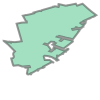

In [31]:
df_tree_cph['geometry'][0]

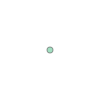

In [50]:
df_tree_cph_contig['geometry_point'][0]

In [51]:
# Read dataframe to geodataframe
tree_neighbourhood_crs = {'init': 'epsg:4326'}
tree_neighbourhood_geo = gpd.GeoDataFrame(df_tree_cph_contig,
                                  crs = tree_neighbourhood_crs,
                             geometry = df_tree_cph_contig.geometry_point)
# Get x and y coordinates
tree_neighbourhood_geo['x'] = [geometry.x for geometry in tree_neighbourhood_geo['geometry_point']]
tree_neighbourhood_geo['y'] = [geometry.y for geometry in tree_neighbourhood_geo['geometry_point']]
p_df = tree_neighbourhood_geo.drop('geometry_point', axis = 1).copy()
sitesource = ColumnDataSource(p_df)

In [57]:
p_df

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,torso_bemaerkning,wkb_geometry,bydel_nr,name,geometry,tree_sum,X,Y,x,y
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,POINT (12.5370471883976 55.6486340745573),4,Vesterbro-Kongens Enghave,POINT (12.53705 55.64863),6679,12.537047,55.648634,12.537047,55.648634
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,POINT (12.536925020477707 55.64867988581558),4,Vesterbro-Kongens Enghave,POINT (12.53693 55.64868),6679,12.536925,55.648680,12.536925,55.648680
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,POINT (12.537000905330974 55.64876361021244),4,Vesterbro-Kongens Enghave,POINT (12.53700 55.64876),6679,12.537001,55.648764,12.537001,55.648764
3,trae_basis.4,gadetræ,nej,21293,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,POINT (12.537133269649273 55.64872321507861),4,Vesterbro-Kongens Enghave,POINT (12.53713 55.64872),6679,12.537133,55.648723,12.537133,55.648723
4,trae_basis.5,gadetræ,nej,21294,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,POINT (12.537399549194998 55.648992732825036),4,Vesterbro-Kongens Enghave,POINT (12.53740 55.64899),6679,12.537400,55.648993,12.537400,55.648993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57001,trae_basis.59341,gadetræ,nej,88290,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,POINT (12.588915390933636 55.663513405407954),10,Amager Vest,POINT (12.58892 55.66351),4477,12.588915,55.663513,12.588915,55.663513
57002,trae_basis.59342,gadetræ,nej,88291,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,POINT (12.589373408286578 55.66346114344853),10,Amager Vest,POINT (12.58937 55.66346),4477,12.589373,55.663461,12.589373,55.663461
57003,trae_basis.59343,gadetræ,nej,88292,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,POINT (12.590262530186026 55.66335899115046),10,Amager Vest,POINT (12.59026 55.66336),4477,12.590263,55.663359,12.590263,55.663359
57004,trae_basis.59344,gadetræ,nej,88293,2 Træer,2.1 Fuldkronede gade- og torvetræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_2455,...,NaN,POINT (12.591112764719758 55.66326322087783),10,Amager Vest,POINT (12.59111 55.66326),4477,12.591113,55.663263,12.591113,55.663263


In [53]:
# Uses custom_filter to determine which set of sites are visible
view = CDSView(source = sitesource)

In [ ]:
# Make a slider object to toggle the month shown
slider = Slider(title = ‘Month’, 
                start = 1, end = 12, 
                step = 1, value = 1)

In [54]:
# Plots the water sampling sites based on month in slider
sites = p.circle('x', 'y', source = sitesource, color = 'red', 
                 size = 5, alpha = 0.3, view = view)
# Add hover tool
#p.add_tools(HoverTool(renderers = [sites],
#                      tooltips = [('Tree type', '@name'),
#                                  ('Category', '@kategori')
                      #            ('Date', '@ActivityStartDate'),
                      #            ('Lead (ug/l)', '@LeadValue_ug_l')]))
#                                 ]))
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
#layout = column(p, widgetbox(slider))

#p.scatter(x, y, radius=radii,
#          fill_color=colors, fill_alpha=0.6,
#          line_color=None)

#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser


TypeError: Object of type Point is not JSON serializable

In [65]:
geosource1 = GeoJSONDataSource(geojson = df_tree_cph_contig.to_json())

OverflowError: Maximum recursion level reached

In [64]:
import json

from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

#output_file("geojson.html")

data = json.loads(geojson)
for i in range(len(data['features'])):
    data['features'][i]['properties']['Color'] = ['blue', 'red'][i%2]

geo_source = GeoJSONDataSource(geojson=df_tree_cph_contig)

#TOOLTIPS = [
#    ('Organisation', '@OrganisationName')
#]

p = figure(background_fill_color="lightgrey")#, tooltips=TOOLTIPS)
p.circle(x='x', y='y', size=15, alpha=0.7, source=geo_source)

show(p)


ValueError: expected a value of type str, got                     FID kategori saerligt_trae     id     type  \
0          trae_basis.1  gadetræ           nej  18611  2 Træer   
1          trae_basis.2  gadetræ           nej  21291  2 Træer   
2          trae_basis.3  gadetræ           nej  21292  2 Træer   
3          trae_basis.4  gadetræ           nej  21293  2 Træer   
4          trae_basis.5  gadetræ           nej  21294  2 Træer   
...                 ...      ...           ...    ...      ...   
57001  trae_basis.59341  gadetræ           nej  88290  2 Træer   
57002  trae_basis.59342  gadetræ           nej  88291  2 Træer   
57003  trae_basis.59343  gadetræ           nej  88292  2 Træer   
57004  trae_basis.59344  gadetræ           nej  88293  2 Træer   
57005  trae_basis.59345  gadetræ           nej  88295  2 Træer   

                                   element under_element ny_dm_element  \
0                            2.3 Parktræer           NaN     Gadetræer   
1                            2.3 Parktræer           NaN     Gadetræer   
2                            2.3 Parktræer           NaN     Gadetræer   
3                            2.3 Parktræer           NaN     Gadetræer   
4                            2.3 Parktræer           NaN     Gadetræer   
...                                    ...           ...           ...   
57001  2.1 Fuldkronede gade- og torvetræer           NaN     Gadetræer   
57002  2.1 Fuldkronede gade- og torvetræer           NaN     Gadetræer   
57003  2.1 Fuldkronede gade- og torvetræer           NaN     Gadetræer   
57004  2.1 Fuldkronede gade- og torvetræer           NaN     Gadetræer   
57005  2.1 Fuldkronede gade- og torvetræer           NaN     Gadetræer   

      ny_dm_under_element  arbsted_tekst_id  ...  \
0                 Gadetræ  Gadet_Gadet_3421  ...   
1                 Gadetræ  Gadet_Gadet_3421  ...   
2                 Gadetræ  Gadet_Gadet_3421  ...   
3                 Gadetræ  Gadet_Gadet_3421  ...   
4                 Gadetræ  Gadet_Gadet_3421  ...   
...                   ...               ...  ...   
57001             Gadetræ  Gadet_Gadet_2455  ...   
57002             Gadetræ  Gadet_Gadet_2455  ...   
57003             Gadetræ  Gadet_Gadet_2455  ...   
57004             Gadetræ  Gadet_Gadet_2455  ...   
57005             Gadetræ  Gadet_Gadet_2455  ...   

                                        wkb_geometry bydel_nr  \
0          POINT (12.5370471883976 55.6486340745573)        4   
1       POINT (12.536925020477707 55.64867988581558)        4   
2       POINT (12.537000905330974 55.64876361021244)        4   
3       POINT (12.537133269649273 55.64872321507861)        4   
4      POINT (12.537399549194998 55.648992732825036)        4   
...                                              ...      ...   
57001  POINT (12.588915390933636 55.663513405407954)       10   
57002   POINT (12.589373408286578 55.66346114344853)       10   
57003   POINT (12.590262530186026 55.66335899115046)       10   
57004   POINT (12.591112764719758 55.66326322087783)       10   
57005   POINT (12.592055145465858 55.66315680757381)       10   

                            name                   geometry tree_sum  \
0      Vesterbro-Kongens Enghave  POINT (12.53705 55.64863)     6679   
1      Vesterbro-Kongens Enghave  POINT (12.53693 55.64868)     6679   
2      Vesterbro-Kongens Enghave  POINT (12.53700 55.64876)     6679   
3      Vesterbro-Kongens Enghave  POINT (12.53713 55.64872)     6679   
4      Vesterbro-Kongens Enghave  POINT (12.53740 55.64899)     6679   
...                          ...                        ...      ...   
57001                Amager Vest  POINT (12.58892 55.66351)     4477   
57002                Amager Vest  POINT (12.58937 55.66346)     4477   
57003                Amager Vest  POINT (12.59026 55.66336)     4477   
57004                Amager Vest  POINT (12.59111 55.66326)     4477   
57005                Amager Vest  POINT (12.59206 55.66316)     4477   

               X          Y                               geometry_point  \
0      12.537047  55.648634    POINT (12.5370471883976 55.6486340745573)   
1      12.536925  55.648680  POINT (12.53692502047771 55.64867988581558)   
2      12.537001  55.648764  POINT (12.53700090533097 55.64876361021244)   
3      12.537133  55.648723  POINT (12.53713326964927 55.64872321507861)   
4      12.537400  55.648993    POINT (12.537399549195 55.64899273282504)   
...          ...        ...                                          ...   
57001  12.588915  55.663513  POINT (12.58891539093364 55.66351340540795)   
57002  12.589373  55.663461  POINT (12.58937340828658 55.66346114344853)   
57003  12.590263  55.663359  POINT (12.59026253018603 55.66335899115046)   
57004  12.591113  55.663263  POINT (12.59111276471976 55.66326322087783)   
57005  12.592055  55.663157  POINT (12.59205514546586 55.66315680757381)   

               x          y  
0      12.537047  55.648634  
1      12.536925  55.648680  
2      12.537001  55.648764  
3      12.537133  55.648723  
4      12.537400  55.648993  
...          ...        ...  
57001  12.588915  55.663513  
57002  12.589373  55.663461  
57003  12.590263  55.663359  
57004  12.591113  55.663263  
57005  12.592055  55.663157  

[57006 rows x 192 columns] of type DataFrame

In [ ]:
import numpy as np

from bokeh.plotting import figure, output_file, show

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [ ]:
districtName = ['Vesterbro-Kongens Enghave', 'Indre By', 'Nørrebro', 'Valby',
       'Vanløse', 'Bispebjerg', 'Brønshøj-Husum', 'Amager Øst',
       'Østerbro', 'Amager Vest']
treeName = ['Lind', 'Kirsebær/Blomme', 'Tjørn', 'Robinie',
       'Kastanie', 'Valnød', 'Hestekastanie', 'Poppel', 'Ask', 'Eg',
       'Løn', 'Platan', 'Avnbøg', 'Røn', 'Skyrækker', 'Tretorn',
       'Trompetkrone', 'Pil', 'Tulipantræ', 'Hassel', 'Birk',
       'Sequoiadendron, ikke navngivet på dansk', 'Gingko', 'Bøg',
       'Vandgran', 'Æble', 'El', 'Sydbøg', 'Fyr', 'Elm', 'Hemlock',
       'Lærk', 'Kornel', 'Morbær', 'Bærmispel', 'Thuja', 'Taks',
       'Dværgcypres', 'Ægte kastanie', 'Gran', 'Ædelgran', 'Kristtorn',
       'Guldregn', 'Ceder', 'Sophora', 'Humlebøg', 'Kvæde', 'Benved',
       'Magnolia', 'Aralie', 'Douglasgran', 'Hønsebenstræ', 'Paulównia',
       'Ene', 'Pære', 'Ambratræ', 'Syren-slægten', 'Snebolle',
       'Hibiscus-slægten', 'Sølvblad ', 'Storaks', 'Vingevalnød', 'Nyssa',
       'Bjergthe', 'Osagetorn', 'Parrotia, ikke navngivet på dansk',
       'Mispel', 'Albizia (Ærteblomst-fam,)',
       'Zelkova, ikke navngivet på dansk',
       'Taxodium, ikke navngivet på dansk', 'Hjertetræ'] # 'Ikke registreret'

In [ ]:
colornames = named.__all__
colornames = colornames[:len(treeName)]

In [ ]:
# Creat the checkbox selection element
tree_selection = CheckboxGroup(labels=treeName,active =[0,1])

In [ ]:
[tree_selection.labels[i] for i in tree_selection.active]

In [ ]:
# Update function takes three default parameters
def update(attr, old, new):
    trees_to_plot = [tree_selection.labels[i] for i in 
                        tree_selection.active]
    temp = make_dataset(trees_to_plot,
                           bin_width = 40)
    # \TODO: add more code here!

The inspiration is taken from: https://github.com/WillKoehrsen/Bokeh-Python-Visualization/blob/master/interactive/exploration/interactive_development.ipynb

In [ ]:
# Create an empty figure
p = figure(x_range = districtName,plot_width = 900, plot_height=400, 
           title='Tree pr. district',toolbar_location= None)
# Stacked bar chart
renderers = p.vbar_stack(stackers=treeName,x='bydelsnavn',source=temp,
            width=0.5, color = colornames)
# Add the hover tool
for r in renderers:
    tree = r.name
    hover = HoverTool(tooltips=[
        ("%s" % tree, "@{%s}" % tree)
    ], renderers = [r])
    p.add_tools(hover)
p.xaxis.axis_label = 'Copenhagen city cistricts'
p.yaxis.axis_label = 'Tree counts'
# Creat the checkbox selection element
tree_selection = CheckboxGroup(labels=treeName, active = [0,1])
# Link the checkboxes to the information on the graph
tree_selection.on_change('active', update)
# Add to the CheckboxGroup to the figure
controls = WidgetBox(tree_selection)
layout = row(controls,p)
#show(p)
show(layout)